<a href="https://colab.research.google.com/github/jpequegn/wkoAnalysis/blob/master/notebooks/MMPCurve_fitting_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("../data/mmpcurve.csv")

In [ ]:
inp = 1
hidden = 16
out = 1
lr = 1e-3

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(inp, hidden),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden, hidden),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden, hidden),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden, out)
)

In [ ]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [ ]:
# Generate some training data based on the true function
x = torch.tensor(df['Secs'].values.astype(np.float32).reshape(rows,1))
y = torch.tensor(df['Watts'].values.astype(np.float32).reshape(rows,1))


In [ ]:
optim = torch.optim.Adam(model.parameters(), lr = lr)

In [ ]:
for i in range(20000):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    if (i%1000)==0:
        print(i, loss.item())
    
    optim.zero_grad()
    loss.backward()
    optim.step()

0 25898892.0
1000 1164209.875
2000 283375.21875
3000 119580.234375
4000 68784.5
5000 56626.6640625
6000 22627.85546875
7000 19542.962890625
8000 14790.896484375
9000 19860.443359375
10000 88115.2734375
11000 9463.345703125
12000 11731.8310546875
13000 8408.00390625
14000 14595.5390625
15000 12129.326171875
16000 7676.76611328125
17000 8061.59521484375
18000 36475.28125
19000 16796.49609375


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
predicted_tensor = model(x)
predicted = predicted_tensor.detach().numpy()

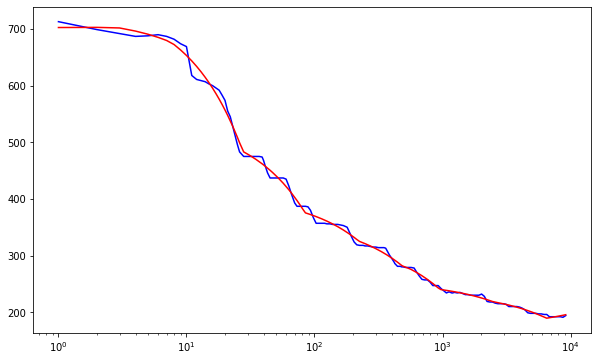

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x, y, label='orig', c='b')
plt.plot(x, predicted, label='predict', c='r')
plt.xscale('log')

In [ ]:
test = torch.tensor(np.array([[600,]], dtype=np.float32))
predict = model(test)

In [ ]:
predict

tensor([[273.1032]], grad_fn=<AddmmBackward>)